In [1]:
# import necessary packages
import numpy as np
from numpy import genfromtxt
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
from scipy.spatial import distance
from sklearn import manifold
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import euclidean_distances
import csv
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
import math
import seaborn as sns
import random

%matplotlib inline

In [2]:
# load file
x = genfromtxt('CleanData_final.txt', delimiter=" ")
print (x.shape)

(488919, 1043)


In [3]:
# transpose data
a = x.T
print (a.shape)

(1043, 488919)


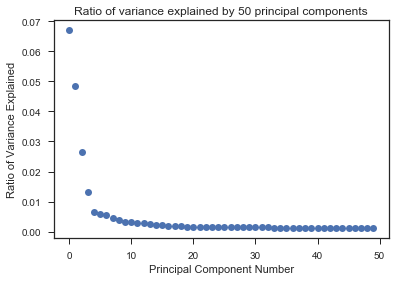

In [4]:
# fitting the data for PCA plotting
n_components = 50
pca = PCA(n_components=n_components, svd_solver='arpack')
x_pca = pca.fit_transform(a)

# ratio of variance explained by the first 50 principal components
sns.set_style("ticks")
plt.plot(pca.explained_variance_ratio_, "o", linewidth=2)
plt.title('Ratio of variance explained by 50 principal components')
plt.axis('tight')
plt.xlabel('Principal Component Number')
plt.ylabel('Ratio of Variance Explained')

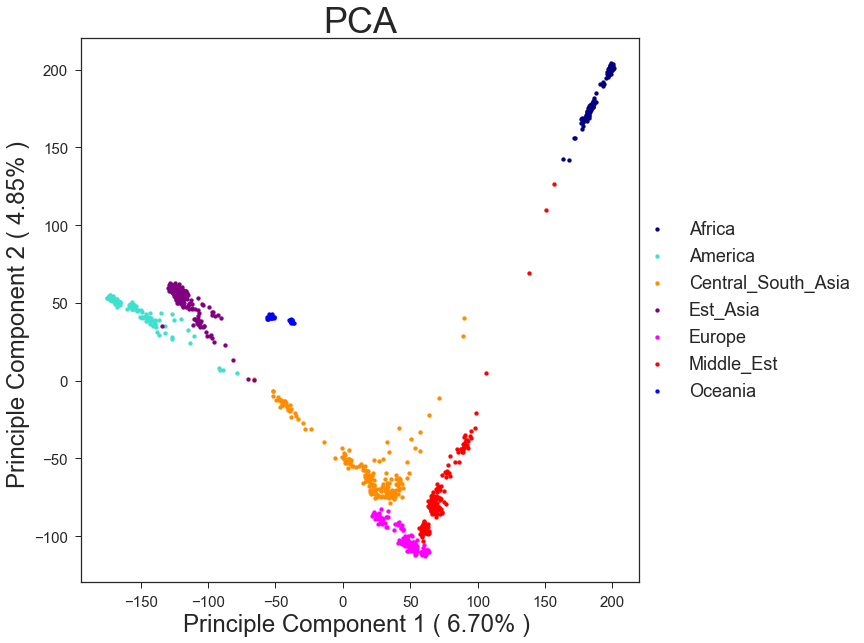

In [13]:
# 2-dimensional PCA plot with PCA & Incremental PCA

# assign people from different regions
y = pd.read_table('INDEX.region.txt', header=None)
Region = (y[1])

# for group coloring / marking in the graph
colors = ['navy', 'turquoise', 'darkorange', 'purple', 'magenta', 'red', 'blue']
region_names = ['Africa','America','Central_South_Asia','Est_Asia','Europe','Middle_Est','Oceania']

# plot graph
x_transformed = x_pca
pc1_r=str(float(pca.explained_variance_ratio_[0])* 100)[:4] + '%'
pc2_r=str(float(pca.explained_variance_ratio_[1])* 100)[:4] + '%'
title = "PCA"

plt.figure(figsize=(10, 10))
for color, region_name in zip(colors, region_names):
    plt.scatter(x_transformed[ (Region == region_name) , 0], x_transformed[(Region == region_name) , 1], s=8, color=color, lw=1.5, label=region_name)
    plt.title(title, fontsize=36)
    plt.legend(loc='center left', bbox_to_anchor=(0.97, 0.5), shadow=False, scatterpoints=1, fontsize=18)
    plt.xlabel('Principle Component 1 ( %s ) '%(pc1_r), fontsize=24)
    plt.ylabel('Principle Component 2 ( %s ) '%(pc2_r), fontsize=24)
    plt.tick_params(labelsize=15)

plt.show()

In [14]:
# define function for calculating genetic distance
def dist_numpy(ind1, ind2):
    """
    Use vectorized numpy ops to compute d(i,j) 
    between two sample genotype vectors
    """
    numerator = float(np.sum(np.square(ind1-ind2)))
    return numerator / float(488919)

In [15]:
# calculate pairwise genetic distance of all samples
n = x.shape[1]
d = np.zeros(shape=(n,n))

for i in range(n-1):
    for j in range(i+1,n):
        d[i,j] = dist_numpy(x[:,i], x[:,j])
        
print (d)

[[ 0.          0.59290394  0.59097724 ...,  0.83503402  0.836928
   0.84029256]
 [ 0.          0.          0.59679415 ...,  0.83206012  0.83263281
   0.83726139]
 [ 0.          0.          0.         ...,  0.83354093  0.83320959
   0.83495017]
 ..., 
 [ 0.          0.          0.         ...,  0.          0.42211082
   0.43533387]
 [ 0.          0.          0.         ...,  0.          0.          0.43335399]
 [ 0.          0.          0.         ...,  0.          0.          0.        ]]


In [17]:
# calculate pairwise euclidean distance between any two individuals on PCA
n = 1043
E = np.zeros(shape=(n,n))

for i in range(n-1):
    for j in range(i+1,n):
        p1=(x_pca[i,0], x_pca[i,1])
        p2=(x_pca[j,0], x_pca[j,1])
        E[i,j] = distance.euclidean(p1,p2)

print (E)

[[   0.            4.33069294    4.60074102 ...,  255.13995577
   254.73996752  255.26541079]
 [   0.            0.            0.31115653 ...,  251.3925056   250.98025114
   251.50997805]
 [   0.            0.            0.         ...,  251.0813594   250.66912452
   251.19884343]
 ..., 
 [   0.            0.            0.         ...,    0.            1.49337065
     0.94244322]
 [   0.            0.            0.         ...,    0.            0.
     0.72935811]
 [   0.            0.            0.         ...,    0.            0.            0.        ]]


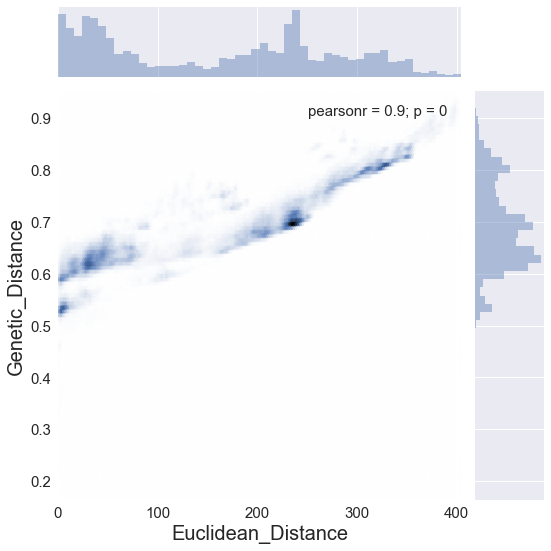

In [20]:
# check the correlation between genetic distance and euclidean distance & create scatter plot
M = E.flatten()
N = d.flatten()

M_nozero = M[M!=0]
N_nozero = N[N!=0]
    
table={'Euclidean_Distance': M_nozero,
       'Genetic_Distance': N_nozero}
df = pd.DataFrame(table, columns = ['Euclidean_Distance', 'Genetic_Distance'])

# correlation between genetic distance and euclidean distance on kernel density estimation plot
sns.set(font_scale = 1.5)
plt.rc("legend", fontsize=15)
plt.rcParams["axes.labelsize"] = 20
g = sns.jointplot("Euclidean_Distance", "Genetic_Distance", data=df, size=8, kind="hex")

In [21]:
E_new = E+E.T
d_new = d+d.T

# select one individual as an example for plotting Euclidean distance vs Genetic distance
ind = 0
print(Region[ind])
table={'Region': Region,
       'Euclidean': E_new[ind,:],
       'GenomicDistance':d_new[ind,:]}
df = pd.DataFrame(table, columns = ['Region','Euclidean', 'GenomicDistance'])
mask = np.any(df==0, axis=1)
df = df[~mask]

Africa


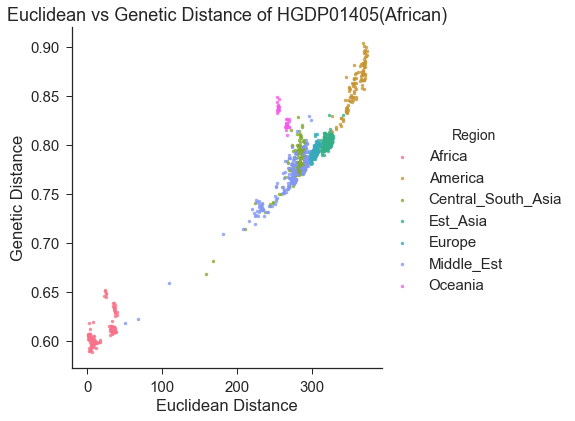

In [22]:
sns.set_context("notebook", font_scale=1.5)
sns.set_style("ticks")
sns.lmplot('Euclidean', 'GenomicDistance', size=6, 
           fit_reg=False, data=df, scatter_kws={"marker": "D", "s": 12}, hue='Region') 

plt.title('Euclidean vs Genetic Distance of HGDP01405(African)')
plt.xlabel('Euclidean Distance')
plt.ylabel('Genetic Distance')